# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#1. Загрузите данные из файла в датафрейм.
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
#2. Изучите общую информацию о полученном датафрейме.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


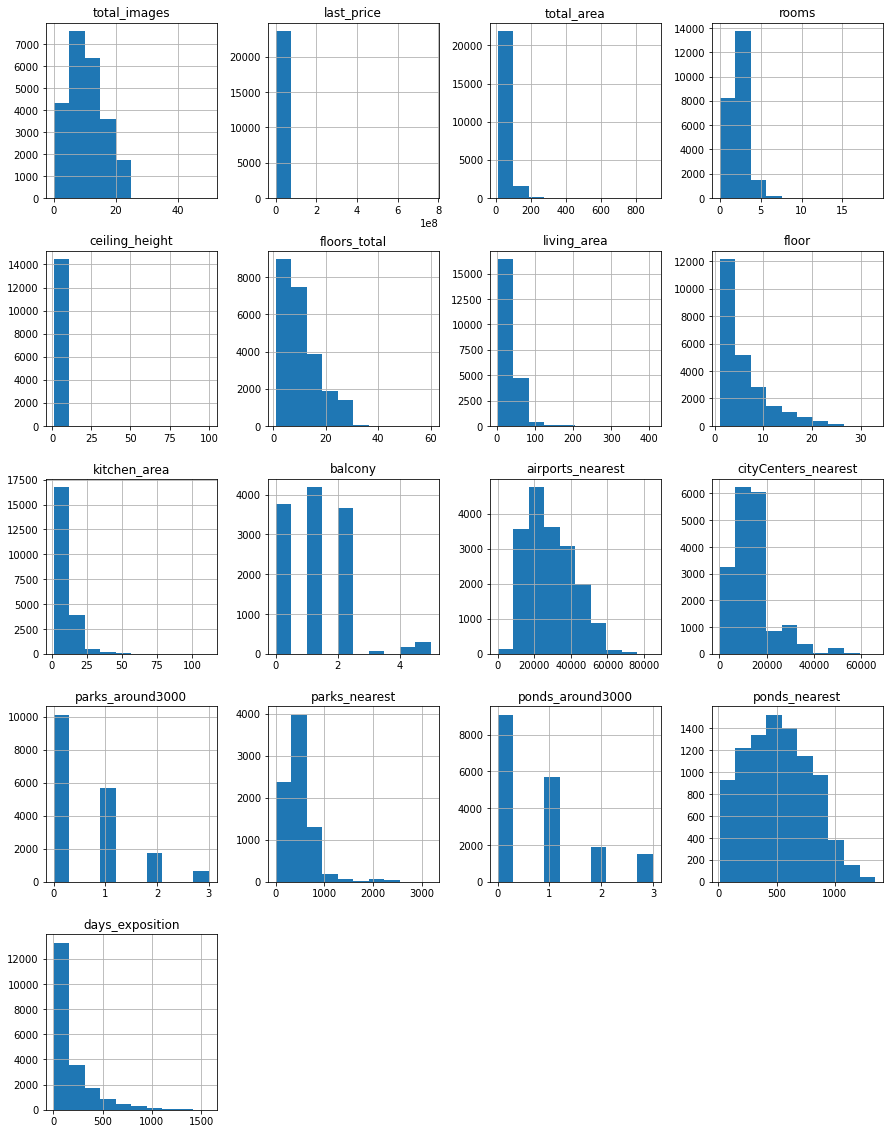

In [4]:
#3. Постройте общую гистограмму для всех числовых столбцов
#таблицы. Например, для датафрейма data это можно сделать
#командой data.hist(figsize=(15, 20)).
data.hist(figsize=(15, 20));

### Предобработка данных

***1 ЗАДАНИЕ***

Найдите и изучите пропущенные значения в столбцах:

○ Определите, в каких столбцах есть пропуски.

○ Заполните пропущенные значения там, где это возможно.

Например, если продавец не указал число балконов, то,
скорее всего, в его квартире их нет. Такие пропуски
правильно заменить на 0. Если логичную замену
предложить невозможно, то оставьте эти значения
пустыми. Пропуски — тоже важный сигнал, который нужно
учитывать.

○ В ячейке с типом markdown укажите причины, которые могли
привести к пропускам в данных.


In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('YlOrRd')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [7]:
data['balcony'] = data['balcony'].fillna(0)

In [8]:
data['living_area'] = data['living_area'].fillna(data['total_area'] - data['balcony'])

In [9]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])

***ПОЯСНЕНИЕ***
- в столбце балкон вернее всего пропуск означает, что балкона нет 
- в столбцах living_area, kitchen_area пересчитаны пустые значения путем вычитания из общей площади площади балкона и жилой площади соответственно по логике расчетов площадей в квартирах

***2 ЗАДАНИЕ***

Рассмотрите типы данных в каждом столбце:

○ Найдите столбцы, в которых нужно изменить тип данных.

○ Преобразуйте тип данных в выбранных столбцах.

○ В ячейке с типом markdown поясните, почему нужно изменить
тип данных.

In [10]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [85]:
#int
data['floors_total'] = data['floors_total'].fillna(0).astype('int')
data['last_price'] = data['last_price'].astype('int')
# data['balcony'] = data['balcony'].fillna(0).astype('int')
data['airports_nearest'] = data['airports_nearest'].fillna(0).astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0).astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['parks_nearest'] = data['parks_nearest'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
data['ponds_nearest'] = data['ponds_nearest'].fillna(0).astype('int')
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [12]:
data['balcony'] = data['balcony'].astype('int')

***ПОЯСНЕНИЕ***
В вышеуказанных столбцах есть пропуски. Их заменили на 0, чтобы перевести тип данных в int. Во всех столбах значения были .0
Логично предположить, что это целые числа. И по значению - этажи, балкон, количество прудов, аэропортов, парков и дней - это все целые значения.

***3 ЗАДАНИЕ***

Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [13]:
#str
data['locality_name'] = data['locality_name'].fillna('unknown')
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].replace('поселок рябово', 'поселок городского типа рябово')

In [14]:
len(data['locality_name'].unique())

330

In [15]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

***ПОЯСНЕНИЕ*** Замена всех пропусков на unknown. Перевод всех названий в строчные буквы, замена ё на е. 

In [16]:
#float
data['ceiling_height'] = data['ceiling_height'].fillna(0)

***ПОЯСНЕНИЕ*** Все пустующие значения в высоте потолков заполнены 0

In [17]:
for name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == name), 'ceiling_height'] = median

data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

for name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == name, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == name), 'cityCenters_nearest'] = median

In [18]:
#bool
data['is_apartment'] = data['is_apartment'].fillna(False)

***ПОЯСНЕНИЕ*** Все пустующие значение заменены на False для перевода в тип данных bool

In [19]:
#datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

***ПОЯСНЕНИЕ*** Преобразован в формат даты

In [20]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,санкт-петербург,18863,16028.0,1,482,2,755,0
1,7,3350000,40.4,2018-12-04,1,0.00,11,18.6,1,False,...,11.0,2,поселок шушары,12817,18603.0,0,0,0,0,81
2,10,5196000,56.0,2015-08-20,2,0.00,5,34.3,4,False,...,8.3,0,санкт-петербург,21741,13933.0,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,0.00,14,159.0,9,False,...,0.0,0,санкт-петербург,28098,6800.0,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,санкт-петербург,31856,8098.0,2,112,1,48,121


In [21]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [22]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest                 int64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                    int64
ponds_around3000                 int64
ponds_nearest                    int64
days_exposition                  int64
dtype: object

In [23]:
data.duplicated().sum()

0

***ПОЯСНЕНИЕ*** Пропуски устранены, форматы преобразованы, дубликаты не найдены, неявные дубликаты в наименовании преобразованы вручную.

***4 ЗАДАНИЕ***

Найдите и устраните редкие и выбивающиеся значения.

Например, в столбце ceiling_height может быть указана высота
потолков 25 м и 32 м. Логично предположить, что на самом деле
это вещественные значения: 2.5 м и 3.2 м. Попробуйте
обработать аномалии в этом и других столбцах.

○ Если природа аномалии понятна и данные действительно
искажены, то восстановите корректное значение.

○ В противном случае удалите редкие и выбивающиеся
значения.

○ В ячейке с типом markdown опишите, какие особенности в
данных вы обнаружили.

In [24]:
data.sort_values('ceiling_height')['ceiling_height'].unique()

array([  0.  ,   1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,
         2.34,   2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,
         2.51,   2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,
         2.59,   2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,
         2.67,   2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,
         2.75,   2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,
         2.83,   2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,
         2.91,   2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,
         2.99,   3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,
         3.07,   3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,
         3.15,   3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,
         3.24,   3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,
         3.32,   3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,
         3.4 ,   3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,
      

In [25]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

In [26]:
data.sort_values('ceiling_height')['ceiling_height'].unique()

array([ 0.  ,  1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,
        2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,
        2.52,  2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,
        2.61,  2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,
        2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,
        2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,
        2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,
        2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,
        3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,
        3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,
        3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,
        3.34,  3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,
        3.44,  3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,
        3.53,  3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,
        3.63,  3.65,

In [27]:
data.sort_values('floors_total')['floors_total'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36,
       37, 52, 60])

In [28]:
data.sort_values('floors_total').query('floors_total > 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18054,1,3300000,34.5,2018-02-26,1,0.00,21,19.9,13,False,...,14.60,2,санкт-петербург,35124,15426.0,2,440,3,82,16
6831,7,6700000,43.0,2017-05-12,2,0.00,21,30.0,9,False,...,5.00,2,санкт-петербург,18893,4358.0,0,0,1,665,270
8218,4,6650000,63.5,2018-02-01,2,0.00,21,37.0,13,False,...,11.00,0,санкт-петербург,10534,12437.0,1,284,1,653,125
11756,6,5830007,88.9,2015-03-10,3,2.70,21,49.9,10,False,...,14.70,0,санкт-петербург,21793,17121.0,0,0,1,31,1099
6860,0,10000000,66.0,2016-05-28,2,0.00,21,39.0,11,False,...,9.00,1,санкт-петербург,30954,8248.0,0,0,2,495,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11079,16,9200000,75.0,2019-02-22,2,2.70,36,40.0,29,False,...,12.00,2,санкт-петербург,18732,20444.0,0,0,3,80,0
397,15,5990000,54.0,2018-03-22,2,0.00,36,21.4,28,False,...,18.70,1,санкт-петербург,18732,20444.0,0,0,3,80,11
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,8.34,0,санкт-петербург,18732,20444.0,0,0,3,80,71
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,14.00,0,санкт-петербург,20728,12978.0,1,793,0,0,45


<AxesSubplot:>

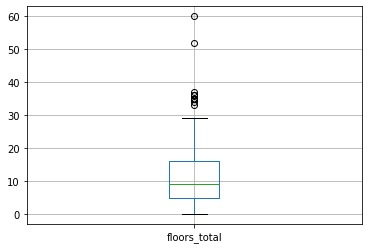

In [29]:
data.boxplot(column='floors_total')

<AxesSubplot:>

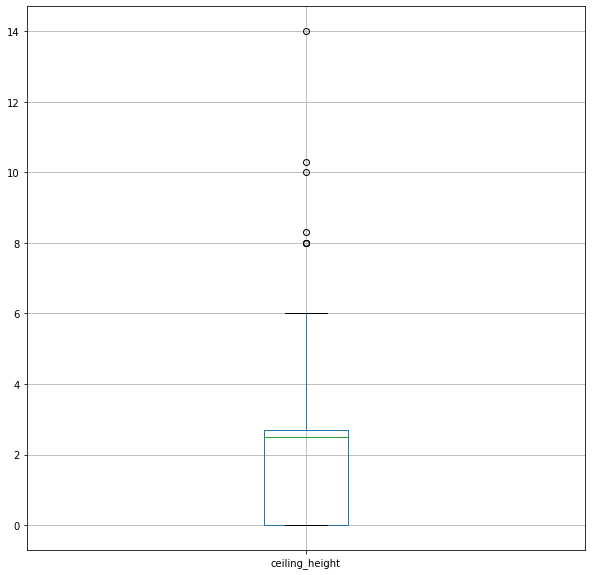

In [30]:
data.boxplot(column='ceiling_height', figsize=(10, 10))

In [31]:
data.query('floors_total == 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,7.4,0,кронштадт,67763,49488.0,2,342,3,614,166


In [32]:
data.loc[data['floors_total'] == 60, 'floors_total'] = data.loc[data['floors_total'] == 60, 'floors_total'] / 10

In [33]:
data.query('floors_total == 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


***ПОЯСНЕНИЯ*** 

Замена значений при высоте потолков >=20 ceiling_height/10

Замена значений при этажности зданий = 60 floors_total/10 
Предварительно проверено этаж floor объекта(4 этаж), что не противоречит тому, что вернее всего ошибка в указании этажности здания в 60 этажей floors_total.

Остальная этажность floors_total> 20 визуально указана верно, т.к. указан floor достаточно высокий.

Добавьте в таблицу новые столбцы со следующими
параметрами:

● цена одного квадратного метра;

● день недели публикации объявления (0 — понедельник, 1 —
вторник и так далее);

● месяц публикации объявления;

● год публикации объявления;

● тип этажа квартиры (значения — « первый», «последний»,
«другой»);

● расстояние до центра города в километрах (переведите из м в км
и округлите до целых значений).

In [34]:
data['price_one_metre'] = round(data['last_price']/data['total_area'])

In [35]:
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [36]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [37]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [38]:
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
     
data['type_floor'] = data.apply(type_floor, axis=1)

In [39]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] /1000

In [40]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

In [41]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_metre,weekday,month,year,type_floor,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482,2,755,0,120370.0,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,0.00,11.0,18.6,1,False,...,0,0,0,81,82921.0,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,0.00,5.0,34.3,4,False,...,90,2,574,558,92786.0,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,0.00,14.0,159.0,9,False,...,84,3,234,424,408176.0,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112,1,48,121,100000.0,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

***1. Изучите следующие параметры объектов:***

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

In [42]:
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'type_floor', 
      'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'weekday', 'month']]

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,type_floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,weekday,month
0,108.00,51.00,25.00,13000000,3,2.70,8,другой,16.0,16028.0,18863,482,3,3
1,40.40,18.60,11.00,3350000,1,0.00,1,первый,11.0,18603.0,12817,0,1,12
2,56.00,34.30,8.30,5196000,2,0.00,4,другой,5.0,13933.0,21741,90,3,8
3,159.00,159.00,0.00,64900000,3,0.00,9,другой,14.0,6800.0,28098,84,4,7
4,100.00,32.00,41.00,10000000,2,3.03,13,другой,14.0,8098.0,31856,112,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,133.81,73.30,13.83,9700000,3,3.70,3,другой,5.0,4232.0,24665,796,1,3
23695,59.00,38.00,8.50,3100000,3,0.00,4,другой,5.0,0.0,0,0,0,1
23696,56.70,29.70,27.00,2500000,2,0.00,1,первый,3.0,0.0,0,0,6,2
23697,76.75,74.75,23.30,11475000,2,3.00,12,другой,17.0,10364.0,39140,173,1,3


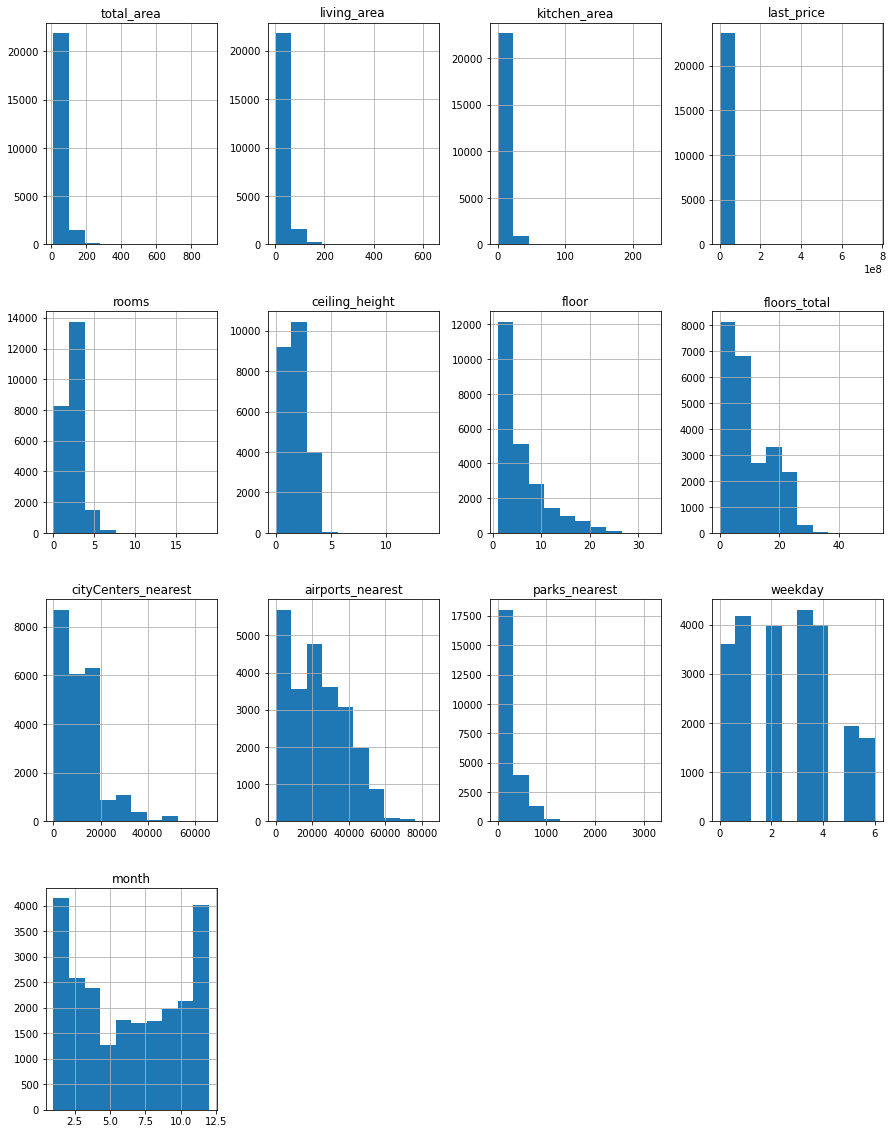

In [43]:
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'type_floor', 
      'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'weekday', 'month']].hist(figsize=(15, 20));

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

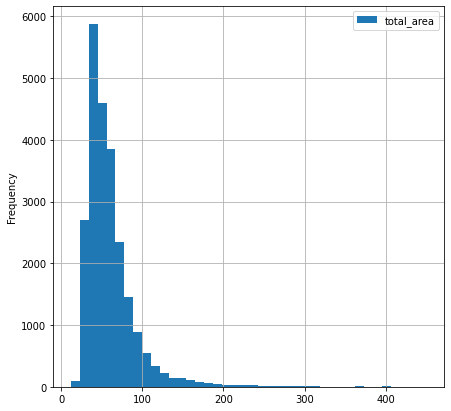

In [44]:
data.plot(
    y = 'total_area', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['total_area'].min(),round(data['total_area'].max()/2)), 
    figsize = (7,7))
data['total_area'].describe()

count    23699.000000
mean        36.750746
std         25.871233
min          2.000000
25%         19.000000
50%         31.000000
75%         44.000000
max        631.000000
Name: living_area, dtype: float64

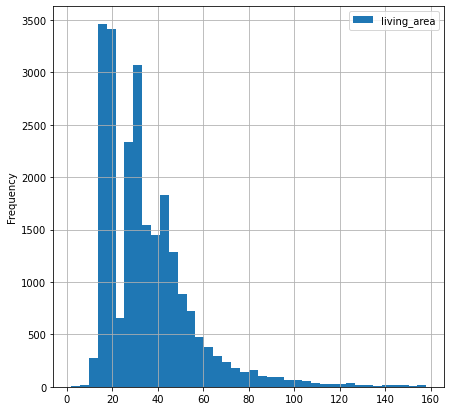

In [45]:
data.plot(
    y = 'living_area', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['living_area'].min(),round(data['living_area'].max()/4)), 
    figsize = (7,7))
data['living_area'].describe()

count    23699.000000
mean        10.201589
std          7.080496
min          0.000000
25%          6.900000
50%          9.000000
75%         12.000000
max        230.000000
Name: kitchen_area, dtype: float64

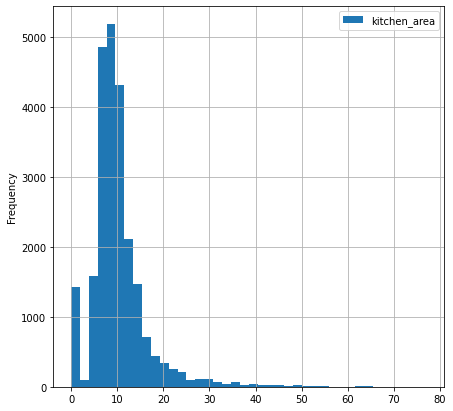

In [46]:
data.plot(
    y = 'kitchen_area', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['kitchen_area'].min(),round(data['kitchen_area'].max()/3)), 
    figsize = (7,7))
data['kitchen_area'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

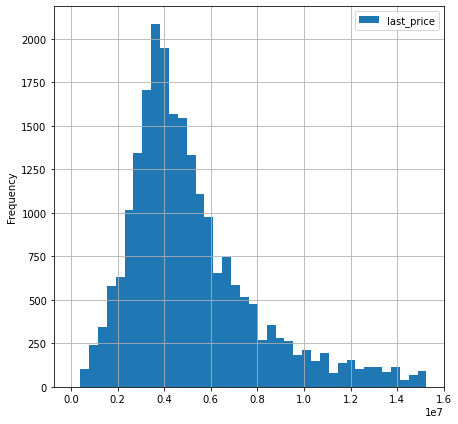

In [47]:
data.plot(
    y = 'last_price', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['last_price'].min(),round(data['last_price'].max()/50)), 
    figsize = (7,7))
data['last_price'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

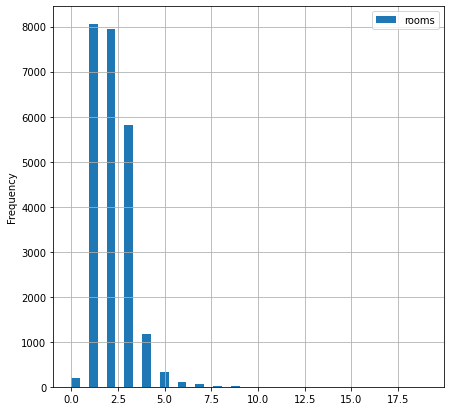

In [48]:
data.plot(
    y = 'rooms', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['rooms'].min(),round(data['rooms'].max())), 
    figsize = (7,7))
data['rooms'].describe()

count    23699.000000
mean         1.670544
std          1.353476
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

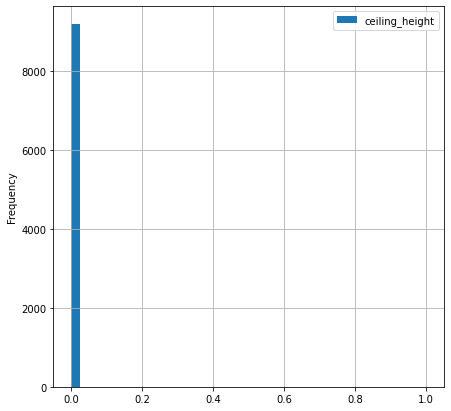

In [49]:
data.plot(
    y = 'ceiling_height', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['ceiling_height'].min(),round(data['ceiling_height'].max()/20)), 
    figsize = (7,7))
data['ceiling_height'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

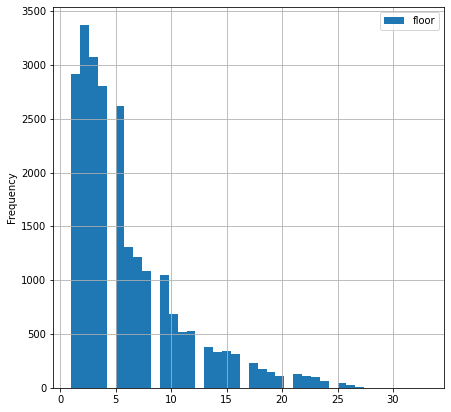

In [50]:
data.plot(
    y = 'floor', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['floor'].min(),round(data['floor'].max())), 
    figsize = (7,7))
data['floor'].describe()

count      23699
unique         3
top       другой
freq       17446
Name: type_floor, dtype: object


<AxesSubplot:>

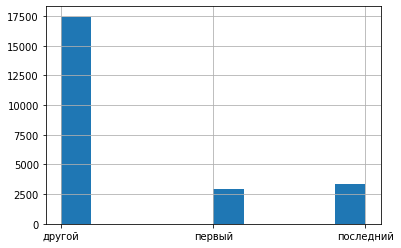

In [87]:
print(data['type_floor'].describe())
data['type_floor'].hist()

count    23699.000000
mean        10.632812
std          6.608689
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64

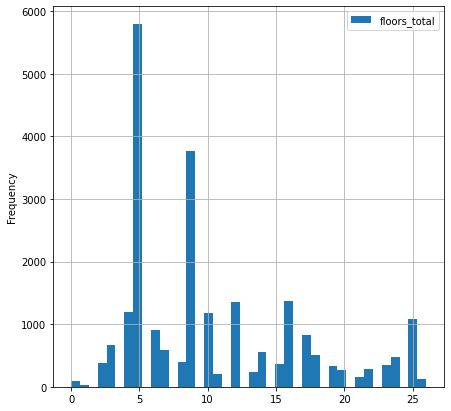

In [52]:
data.plot(
    y = 'floors_total', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['floors_total'].min(),round(data['floors_total'].max()/2)), 
    figsize = (7,7))
data['floors_total'].describe()

count    23699.000000
mean     10886.426896
std       9634.613697
min          0.000000
25%       2242.000000
50%      11247.000000
75%      15248.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

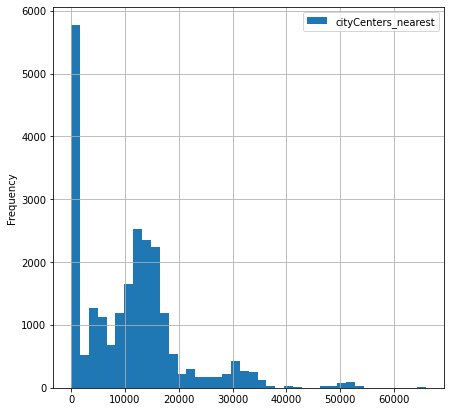

In [53]:
data.plot(
    y = 'cityCenters_nearest', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['cityCenters_nearest'].min(),round(data['cityCenters_nearest'].max())), 
    figsize = (7,7))
data['cityCenters_nearest'].describe()

count    23699.000000
mean     22060.285497
std      16455.276292
min          0.000000
25%      10196.500000
50%      21869.000000
75%      34327.000000
max      84869.000000
Name: airports_nearest, dtype: float64

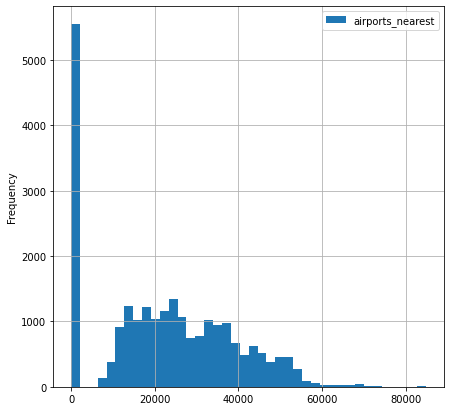

In [54]:
data.plot(
    y = 'airports_nearest', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['airports_nearest'].min(),round(data['airports_nearest'].max())), 
    figsize = (7,7))
data['airports_nearest'].describe()

count    23699.000000
mean       167.315499
std        306.709997
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64

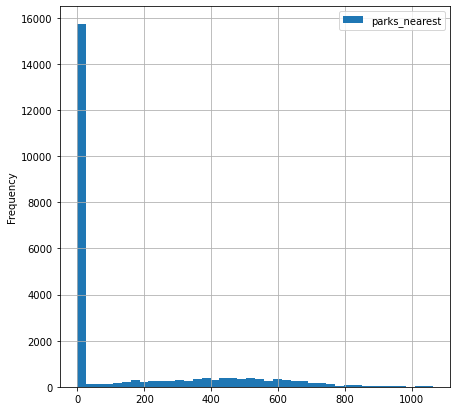

In [55]:
data.plot(
    y = 'parks_nearest', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['parks_nearest'].min(),round(data['parks_nearest'].max()/3)), 
    figsize = (7,7))
data['parks_nearest'].describe()

count    23699.000000
mean         2.569307
std          1.789082
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

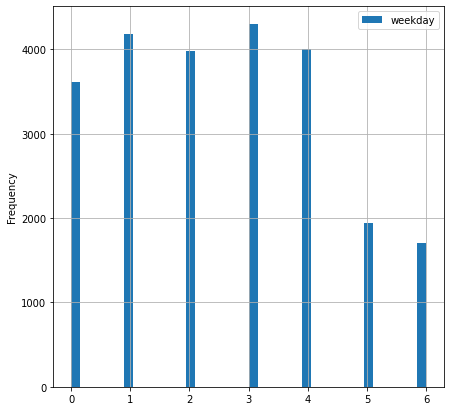

In [56]:
data.plot(
    y = 'weekday', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['weekday'].min(),round(data['weekday'].max())), 
    figsize = (7,7))
data['weekday'].describe()

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

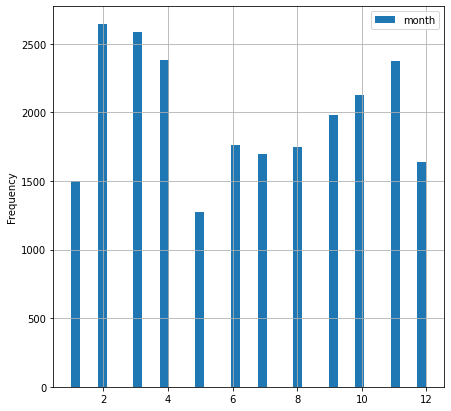

In [88]:
data.plot(
    y = 'month', 
    kind = 'hist',
    bins = 40, 
    grid=True, 
    range = (data['month'].min(),round(data['month'].max())), 
    figsize = (7,7))
data['month'].describe()

***ПОЯСНЕНИЕ***
1. total_area большинство попадает в промежуток 1-100 кв.м., среднее - 60 кв.м., максимальное значение 900 кв.м.
2. living_area 1-50 кв.м., среднее - 36,7 кв.м., максимальное значение 631 кв.м.
3. kitchen_area 0-20, среднее 10 кв.м., максимальное значение 230 кв.м.
4. last_price 1-1, гистограмма не информативна, минимальное значение 1.219 * 1000 = 12 190, максимальное значение 7.630000 * 100000000=763 000 000, среднее 6.541549 * 1000000= 6 541 548  
5. rooms 0-5, среднее 2 комнаты, максимальное значение 19 комнат
6. ceiling_height 0-4, среднее 1,67, максимальное значение 14
7. floor 1-10, среднее 5, максимальное значение 33
8. type_floor 1-3, большинство значений другой (не первый и не последний этаж)
9. floors_total 0-20, среднее 10, максимальное 22
10. cityCenters_nearest 0-20000, среднее 10886 м, максимальное 65968 м
11. airports_nearest 0-50000, среднее 22060 м, максимальное 84869 м
12. parks_nearest 5-500, среднее 167 м, максимальное 3190 м
13. weekday 0-6, в выходные меньше
14. month 1-12, в зимние месяцы больше

***2. Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.***

- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

In [58]:
data[['days_exposition']]

,days_exposition
0,0
1,81
2,558
3,424
4,121
...,...
23694,0
23695,45
23696,0
23697,602


count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

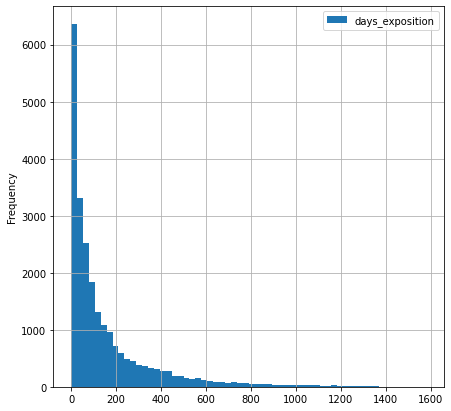

In [59]:
data.plot(
    y = 'days_exposition', 
    kind = 'hist',
    bins = 60, 
    grid=True, 
    range = (data['days_exposition'].min(),round(data['days_exposition'].max())), 
    figsize = (7,7))
data['days_exposition'].describe()

***ПОЯСНЕНИЕ***
days_exposition 0- 300, среднее - 156 дней, медиана - 74 дней, максимальное 1580 дней
Можно считать, что быстрые продажи это все что меньше среднего, для долгих продаж - больше среднего.

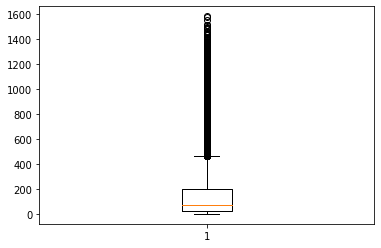

In [60]:
import matplotlib.pyplot as plt
plt.boxplot(data['days_exposition'])
plt.ylim = (1,1000)
plt.show()

<AxesSubplot:ylabel='Frequency'>

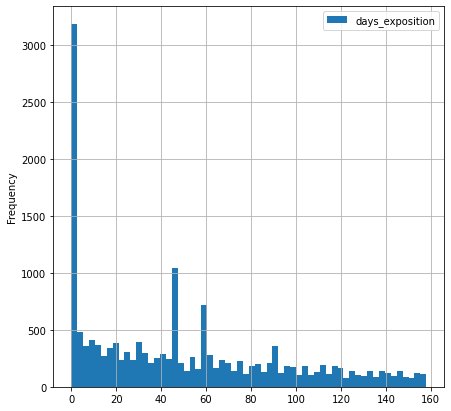

In [61]:
data.plot(
    y = 'days_exposition', 
    kind = 'hist',
    bins = 60, 
    grid=True, 
    range = (data['days_exposition'].min(),round(data['days_exposition'].max()/10)), 
    figsize = (7,7))

In [62]:
data['days_exposition'].value_counts()

0       3181
45       880
60       538
7        234
30       208
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1142, dtype: int64

***3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?***

Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

<AxesSubplot:xlabel='total_area'>

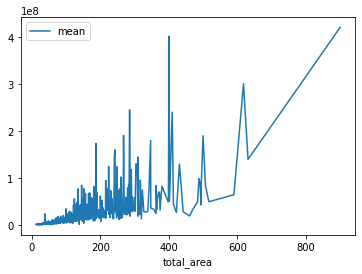

In [63]:
data.groupby('total_area')['last_price'].agg(['mean']).plot()

0.6536750579657242

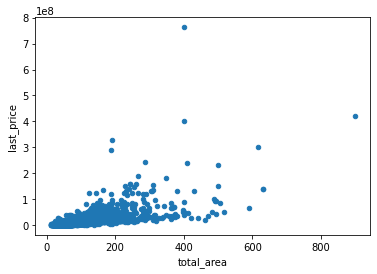

In [64]:
data.plot(x='total_area', y='last_price', kind='scatter')
data['total_area'].corr(data['last_price'])

0.5569904940837231

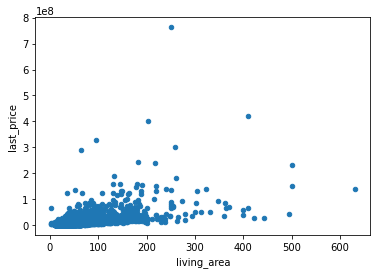

In [65]:
data.plot(x='living_area', y='last_price', kind='scatter')
data['living_area'].corr(data['last_price'])

<AxesSubplot:xlabel='living_area'>

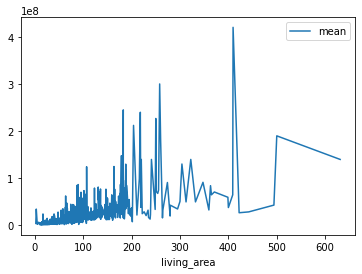

In [66]:
data.groupby('living_area')['last_price'].agg(['mean']).plot()

<AxesSubplot:xlabel='kitchen_area'>

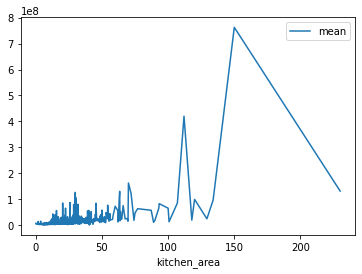

In [67]:
data.groupby('kitchen_area')['last_price'].agg(['mean']).plot()

In [68]:
data.groupby('rooms')['last_price'].agg(['count','sum','mean'])

,count,sum,mean
rooms,,,
0,197,657531650,3.337724e+06
1,8047,30863154174,3.835362e+06
2,7940,44397341986,5.591605e+06
3,5814,47553395187,8.179119e+06
4,1180,15839726678,1.342350e+07
5,326,7746438762,2.376208e+07
6,105,3329523924,3.170975e+07
7,59,3036734076,5.147007e+07
8,12,602690000,5.022417e+07


<AxesSubplot:xlabel='rooms'>

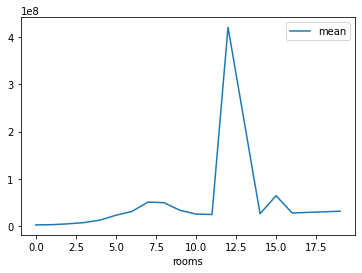

In [69]:
data.groupby('rooms')['last_price'].agg(['mean']).plot()

In [70]:
data.groupby('type_floor')['last_price'].agg(['count','sum','mean'])

,count,sum,mean
type_floor,,,
другой,17446,116459800266,6.675444e+06
первый,2917,14011985190,4.803560e+06
последний,3336,24556378881,7.361025e+06


<AxesSubplot:xlabel='type_floor'>

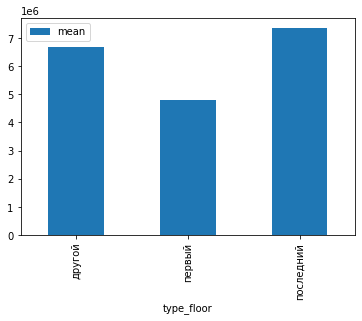

In [71]:
data.groupby('type_floor')['last_price'].agg(['mean']).plot(kind='bar')

<AxesSubplot:xlabel='type_floor'>

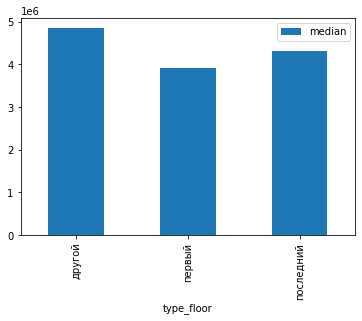

In [72]:
data.groupby('type_floor')['last_price'].agg(['median']).plot(kind='bar')

In [73]:
data.pivot_table(index=('weekday'),values='last_price',aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,last_price,last_price,last_price
weekday,,,
0,3612,23519947686,6.511613e+06
1,4183,26747078406,6.394233e+06
2,3974,26339554491,6.627970e+06
3,4295,28813708580,6.708663e+06
4,4000,25488522415,6.372131e+06
5,1936,13507092433,6.976804e+06
6,1699,10612260326,6.246180e+06


<AxesSubplot:xlabel='weekday'>

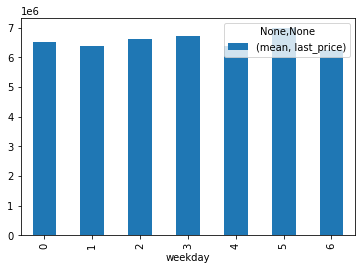

In [74]:
data.pivot_table(index=('weekday'),values='last_price',aggfunc=['mean']).plot(kind='bar')

In [75]:
data.pivot_table(index=('month'),values='last_price',aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,last_price,last_price,last_price
month,,,
1,1500,10002349688,6.668233e+06
2,2640,17076840283,6.468500e+06
3,2587,16451445628,6.359275e+06
4,2379,16027795155,6.737198e+06
5,1274,8408954507,6.600435e+06
6,1760,11106074136,6.310269e+06
7,1695,11270627038,6.649337e+06
8,1744,11074806306,6.350233e+06


<AxesSubplot:xlabel='month'>

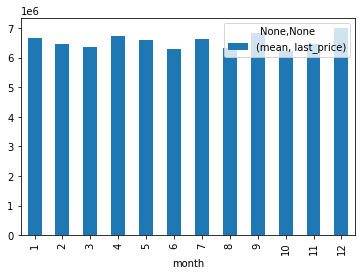

In [76]:
data.pivot_table(index=('month'),values='last_price',aggfunc=['mean']).plot(kind='bar')

In [77]:
data.pivot_table(index=('year'),values='last_price',aggfunc=['count', 'sum', 'mean'])

,count,sum,mean
,last_price,last_price,last_price
year,,,
2014,137,1655937624,1.208714e+07
2015,1191,10210244460,8.572833e+06
2016,2783,19002079638,6.827912e+06
2017,8190,53937123371,6.585729e+06
2018,8519,50696283055,5.950966e+06
2019,2879,19526496189,6.782388e+06


<AxesSubplot:xlabel='year'>

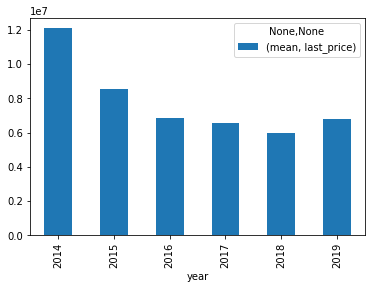

In [78]:
data.pivot_table(index=('year'),values='last_price',aggfunc=['mean']).plot(kind='bar')

***ПОЯСНЕНИЕ*** 

- total_area/last_price тенденция среднего к увеличению с ростом площади и цены
- living_area/last_price чем меньше площадь, тем меньше цена. Есть пиковые значения.
- kitchen_area/last_price чем меньше площадь и цена тем плотнее график. Есть пиковые значения.
- rooms/last_price по графику большой зависимости от количества комнат и средней цены не выявлено, средняя ровная, кроме пикового значения цены
- type_floor/last_price первый этаж дешевле других
- weekday/last_price вторник, пятница, воскресенье идет спад
- month/last_price март, июнь, август, октябрь, ноябрь идет спад
- year/last_price сильно отличается 2014 год, но и количество обьектов там было небольшое, 2018 самая низкая средняя стоимость квартир.

***4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.***

Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [79]:
data_pivot = data.pivot_table(index=('locality_name'),values='price_one_metre',aggfunc=['count', 'mean', 'max', 'min'])
print(data_pivot)

                        count            mean             max             min
              price_one_metre price_one_metre price_one_metre price_one_metre
locality_name                                                                
unknown                    49    94310.020408        196648.0         24005.0
бокситогорск               16    17551.625000         21591.0         14444.0
волосово                   36    40183.305556         52030.0         25000.0
волхов                    111    35087.702703         48276.0         20064.0
всеволожск                398    68654.474874        640422.0         31400.0
...                       ...             ...             ...             ...
сосновый бор               87    75220.402299        126667.0         42500.0
сясьстрой                  24    34405.458333         40920.0         21028.0
тихвин                     49    40048.551020         51767.0         28125.0
тосно                     104    59004.673077        100529.0   

In [80]:
data_pivot.columns = ['count', 'mean', 'max', 'min']

In [81]:
data_pivot.sort_values('count', ascending=False).head(10)

,count,mean,max,min
locality_name,,,,
санкт-петербург,15721,114849.005788,1907500.0,112.0
поселок мурино,556,85681.758993,138580.0,50000.0
поселок шушары,440,78677.379545,147826.0,47700.0
всеволожск,398,68654.474874,640422.0,31400.0
пушкин,369,103125.818428,256522.0,59836.0
колпино,338,75424.571006,125000.0,47957.0
поселок парголово,327,90175.886850,138522.0,39206.0
гатчина,307,68746.110749,146316.0,10507.0
деревня кудрово,299,92473.588629,142857.0,54160.0


In [82]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
санкт-петербург,15721,5500000.0
поселок мурино,556,3400000.0
поселок шушары,440,3950000.0
всеволожск,398,3450000.0
пушкин,369,5180000.0
колпино,338,3600000.0
поселок парголово,327,4100000.0
гатчина,307,3100000.0
деревня кудрово,299,3790000.0


***ПОЯСНЕНИЕ***

Выведено 10 населенных пунктов с наибольшим числом объявлений.

Средняя цена в колонке mean

Максимальная стоимость кв.м. в Санкт-Петербурге, минимальная - Гатчина (есть значение в С.Петербурге 112, понятно, что это ошибка)

***5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.***

Опишите, как стоимость объектов зависит от расстояния до центра города.

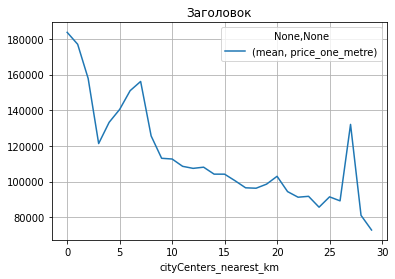

In [89]:
data.query('locality_name == "санкт-петербург"').pivot_table(
    index=('cityCenters_nearest_km'),values='price_one_metre',aggfunc=['mean'])\
    .plot(grid = True, title = 'Заголовок')
plt.show()

***ПОЯСНЕНИЕ*** Чем ближе к центру, тем дороже.

### Общий вывод

В датасете много пропусков и неявных дубликатов, например, в наименовании населенного пункта. Много аномальных значений - высота потолков, этажность, количество комнат, низкая стоимость кв.м. и проч. Пропуски заменены на 0, кроме площади, она рассчитана по формуле общ.пл = жил.пл + кухня, изменены аномальные значения и дубликаты.

Средние значения по датасету:
- total_area среднее - 60 кв.м.
- living_area среднее - 36,7 кв.м.
- kitchen_area среднее 10 кв.м.
- last_price 6 541 548
- rooms среднее 2 комнаты
- floor среднее 5
- type_floor большинство значений другой (не первый и не последний этаж)
- floors_total среднее 10
- cityCenters_nearest среднее 10886 м
- airports_nearest среднее 22060 м
- days_exposition среднее - 156 дней, можно считать, что быстрые продажи это все что меньше среднего, для долгих продаж - больше среднего

Есть зависимость от цены:
- total_area/last_price тенденция среднего к увеличению с ростом площади и цены
- living_area/last_price чем меньше площадь, тем меньше цена
- kitchen_area/last_price чем меньше площадь и цена тем плотнее график
- rooms/last_price средняя ровная
- type_floor/last_price первый этаж дешевле других
- weekday/last_price вторник, пятница, воскресенье идет спад
- month/last_price март, июнь, август, октябрь, ноябрь идет спад
- year/last_price сильно отличается 2014 год, но и количество обьектов там было небольшое, 2018 самая низкая средняя стоимость квартир
- чем ближе к центру, тем дороже

Топ-10 большинства объявлений:
- санкт-петербург
- поселок мурино
- поселок шушары
- всеволожск
- пушкин
- колпино
- поселок парголово
- гатчина
- деревня кудрово
- выборг

